# Libraries

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Loading the data

In [2]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Data/Sentiment140.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Data Preprocessing

In [3]:
dataset = dataset[['sentiment','text']]
sentiment_counts = dataset['sentiment'].value_counts()
print(sentiment_counts)

0    800000
4    800000
Name: sentiment, dtype: int64


In [4]:
# Map sentiment labels to integers (0: negative, 4: positive)
sentiment_map = {0: 0, 4: 1}  # 0: negative, 1: positive
dataset.loc[:, 'sentiment'] = dataset['sentiment'].map(sentiment_map)


C:\Users\IDEH\AppData\Local\Temp\ipykernel_19760\2550957762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'sentiment'] = dataset['sentiment'].map(sentiment_map)


In [5]:
# sentiment_counts = dataset['sentiment'].value_counts()
# print(sentiment_counts)
# import matplotlib.pyplot as plt

# # Assuming sentiment_counts is a pandas Series
# sentiment_counts = dataset['sentiment'].value_counts()

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))
# sentiment_counts.plot(kind='bar', color='skyblue')
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Counts')
# plt.xticks(rotation=0)
# plt.show()


# Preprocessing

In [6]:
import re
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import time

# Define your custom preprocessing function with tqdm and time
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    start_time = time.time()
    
    for tweet in tqdm(textdata, desc="Processing tweets", unit="tweet"):
        tweet = tweet.lower()
        tweet = re.sub(urlPattern, ' URL', tweet)
        tweet = re.sub(userPattern, ' USER', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            word = wordLemm.lemmatize(word)
            tweetwords += (word + ' ')
        processedText.append(tweetwords)
    
    end_time = time.time()
    print(f"Preprocessing completed in {end_time - start_time:.2f} seconds")
    
    return processedText

# Apply the preprocessing function to the text data
processed_text = preprocess(dataset['text'].values)


Processing tweets: 100%|████████████████████████████████████████████████| 1600000/1600000 [04:56<00:00, 5401.74tweet/s]

Preprocessing completed in 296.21 seconds


In [7]:
processed_text

['USER URL aww that s a bummer you shoulda got david carr of third day to do it d ',
 'is upset that he can t update his facebook by texting it and might cry a a result school today also blah ',
 'USER i dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it s not behaving at all i m mad why am i here because i can t see you all over there ',
 'USER not the whole crew ',
 'need a hug ',
 'USER hey long time no see yes rain a bit only a bit lol i m fine thanks how s you ',
 'USER nope they didn t have it ',
 'USER que me muera ',
 'spring break in plain city it s snowing ',
 'i just re pierced my ear ',
 'USER i couldn t bear to watch it and i thought the ua loss wa embarrassing ',
 'USER it it count idk why i did either you never talk to me anymore ',
 'USER i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown ',
 'USER i wish i got to watch it with you i m

# Feature Extraction : HashingVectorizer

In [8]:
from sklearn.feature_extraction.text import HashingVectorizer
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Initialize the HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=10000, stop_words='english', ngram_range=(1, 2))

# Measure the time taken for vectorization
start_time = time.time()

X_hash = hash_vectorizer.fit_transform(tqdm(processed_text, desc="Vectorizing text data", unit="document"))

end_time = time.time()
print(f"Vectorization completed in {end_time - start_time:.2f} seconds")

# Split the data into training and testing sets
start_time = time.time()

X_train_hash, X_test_hash, y_train, y_test = train_test_split(X_hash, dataset['sentiment'].values, test_size=0.2, random_state=0)

end_time = time.time()
print(f"Data splitting completed in {end_time - start_time:.2f} seconds")


Vectorizing text data: 100%|████████████████████████████████████████| 1600000/1600000 [00:43<00:00, 36557.90document/s]


Vectorization completed in 44.82 seconds
Data splitting completed in 0.60 seconds


# Model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the model evaluation function
def model_Evaluate(model):
    y_pred = model.predict(X_test_hash)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [10]:
# Initialize and train the Logistic Regression model
LRmodel = LogisticRegression(C=0.1, max_iter=1000, solver='sag', tol=0.0001, class_weight='balanced', n_jobs=-1)
LRmodel.fit(X_train_hash, y_train) 


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   solver='sag')

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74    159815
           1       0.74      0.76      0.75    160185

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Accuracy: 0.7458625


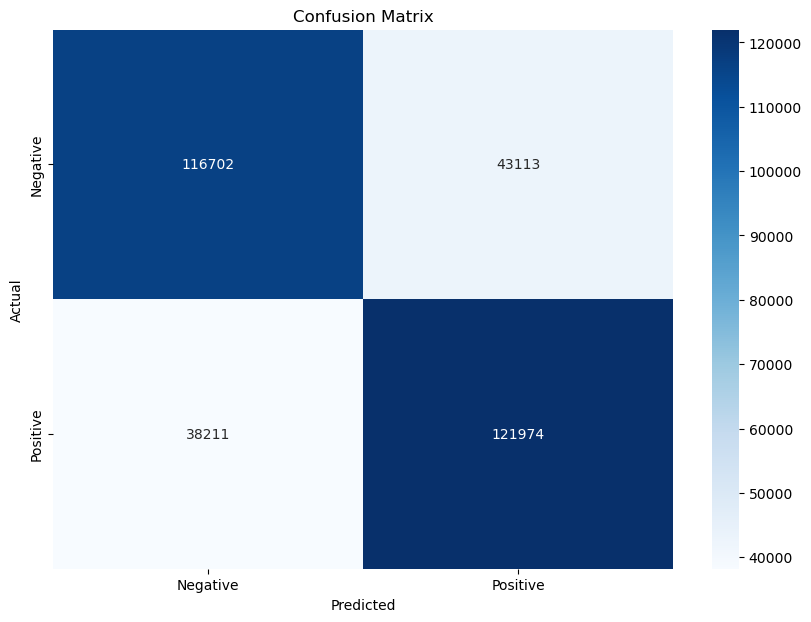

In [11]:
# Evaluate the model
model_Evaluate(LRmodel)


# Customized Grid search

# Logistic Regression + HashVectorization model with best parameters

In [15]:
LRmodel = LogisticRegression(C=0.1, max_iter=1000, solver='sag', tol=0.001, class_weight='balanced', n_jobs=-1)
LRmodel.fit(X_train_hash, y_train)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   solver='sag', tol=0.001)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74    159815
           1       0.74      0.76      0.75    160185

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Accuracy: 0.74585625


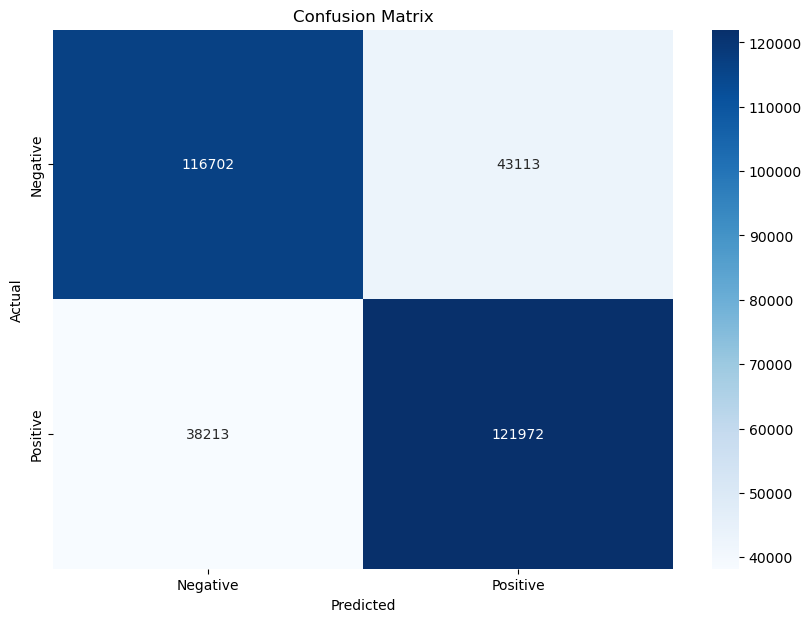

In [16]:
model_Evaluate(LRmodel)